In [196]:
library(data.table)
library(tidyverse)
library(ggrepel)
library(VennDiagram)
library(pheatmap)
library(cowplot)
library(paletteer)
library(grid)
library(gtable)
library(ggforce)

ERROR: Error in library(monocle): there is no package called ‘monocle’


### Fig4a

In [158]:
load("~/HSPC_zenedo/Fig4/Fig4a_heatmap.RData")
load("~/HSPC_zenedo/Fig4/Fig4a_rose.RData")

Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.


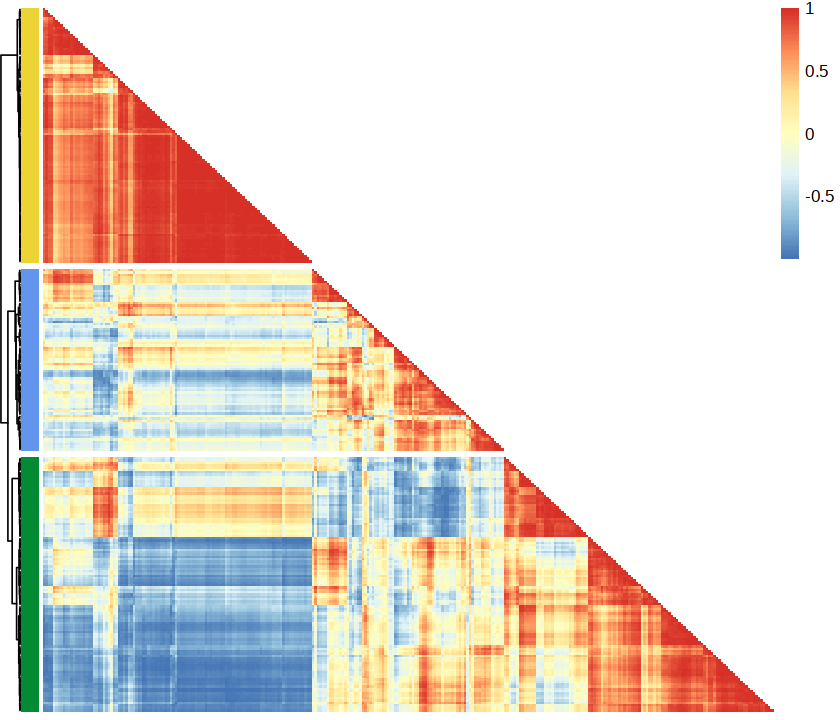

In [174]:
p <- pheatmap(toplot, show_rownames=F, show_colnames=F, cluster_rows=h, 
         cluster_cols=h, annotation_names_row = F, annotation_legend = F, 
         na_col = "white", annotation_row = meta, annotation_colors = anocolor, 
         cutree_rows = 3, treeheight_col = 0, treeheight_row = 7)
colour <- as.vector(t(c1$color))
options(repr.plot.width=6, repr.plot.height=6)
c1_rose <- ggplot(c1, aes(x=reorder(clus, value), y = value, fill=clus)) +
  geom_bar(width=1,stat = 'identity')+
  coord_polar("y", start = 0) +
  scale_fill_manual(values = colour)+
  coord_polar(theta = 'x',start = 0,direction = 1)+
  geom_text(aes(label=c1$value),size=4,vjust ="left",
            hjust ="inward",color ="black",fontface="bold" ) +
 
  theme_void() + 
  guides(fill = guide_legend(title = 'Transcriptome cluster'))

options(repr.plot.width=6, repr.plot.height=6)
c2_rose <- ggplot(c2, aes(x=reorder(clus, value), y = value, fill=clus)) +
  geom_bar(width=1,stat = 'identity')+
  coord_polar("y", start = 0) +
  scale_fill_manual(values = colour)+
  coord_polar(theta = 'x',start = 0,direction = 1)+
  theme_void() + 
  theme(panel.grid=element_blank(),
        panel.background=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        axis.title=element_blank(),
        legend.position = 'none'
  ) +
  geom_text(aes(label=c2$value),size=4,vjust ="left",
            hjust ="inward",color ="black",fontface="bold" ) 

options(repr.plot.width=6, repr.plot.height=6)
c3_rose <- ggplot(c3, aes(x=reorder(clus, value), y = value, fill=clus)) +
  geom_bar(width=1,stat = 'identity')+
  coord_polar("y", start = 0) +
  scale_fill_manual(values = colour)+
  coord_polar(theta = 'x',start = 0,direction = 1)+
  theme_void() + 
  theme(panel.grid=element_blank(),
        panel.background=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        axis.title=element_blank(),
        legend.position = 'none'
  ) +
  geom_text(aes(label=c3$value),size=4,vjust ="left",
            hjust ="inward",color ="black",fontface="bold" ) 

Warning message:
“Use of `c1$value` is discouraged.
ℹ Use `value` instead.”
Warning message:
“Use of `c2$value` is discouraged.
ℹ Use `value` instead.”
Warning message:
“Use of `c3$value` is discouraged.
ℹ Use `value` instead.”


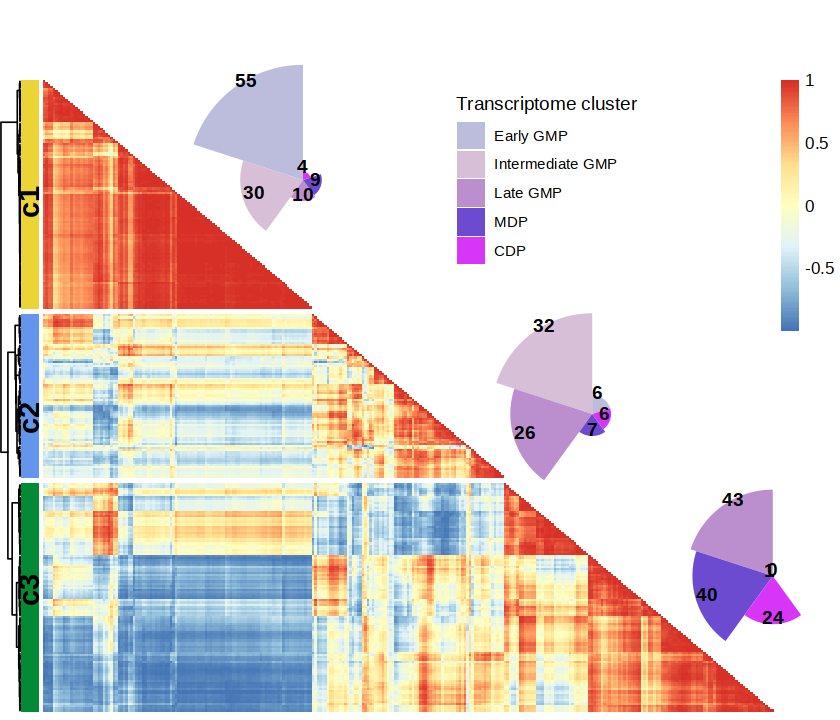

In [179]:
options(repr.plot.width=7, repr.plot.height=6)
ggdraw() + 
    draw_plot(p$gtable, x = 0, y = 0, width = 1, height = .9) +
    draw_plot(c1_rose, x = .17, y = .55, width = .6, height = .4) +
    draw_plot(c2_rose, x = .43, y = .25, width = .55, height = .35) +
    draw_plot(c3_rose, x = .67, y = .05, width = .5, height = .3) + 
    annotate('text', x = .035, y = .72, label = "c1", angle = 90, fontface='bold', size = 6) +
    annotate('text', x = .035, y = .42, label = "c2", angle = 90, fontface='bold', size = 6) + 
    annotate('text', x = .035, y = .18, label = "c3", angle = 90, fontface='bold', size = 6)

### Fig4b

In [180]:
load("~/HSPC_zenedo/Fig4/Fig4b_volcano.RData")

In [181]:
neu_gene <- gene[5:8]
mono_gene <- gene[1:4]

In [193]:
options(repr.plot.width=7, repr.plot.height=6)
p <- ggplot(w, aes(x = methydiff, y = log, color = sig)) +
  geom_point() +
  scale_color_manual(values = c("black","black","grey")) +
  geom_text_repel(data = w[which(w$V7 %in% neu_gene), ], aes(label = w[which(w$V7 %in% neu_gene), ]$V7),
                  col = "red",alpha =0.8, size = 4,box.padding = unit(1, "lines")) +
  geom_text_repel(data = w[which(w$V7 %in% mono_gene), ], aes(label = w[which(w$V7 %in% mono_gene), ]$V7),
                  col = "blue",alpha =0.8, size = 4,box.padding = unit(1, "lines")) +
  theme_classic() + 
  theme(axis.text = element_text(size = 12, color = "black"), axis.title = element_text(size = 15, color = "black"), 
       legend.position = "none") + 
  xlab("△methylation (c3-c2)") + ylab(expression(paste0("-Log"[10], "adjusted P value")))

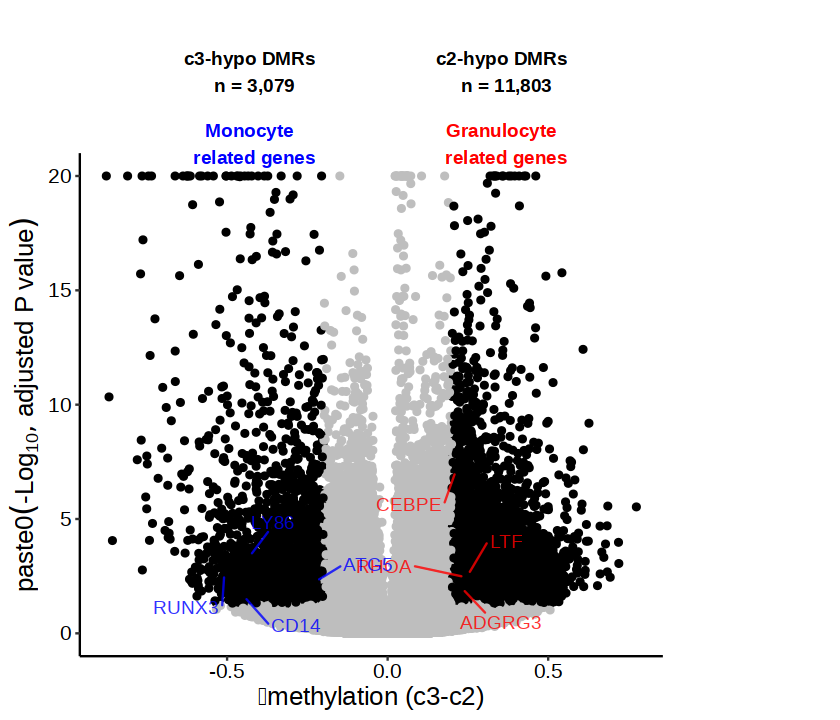

In [194]:
ggdraw() + 
    draw_plot(p, x = 0, y = .0, width = .8, height = .8) +
    annotate('text', x=.3,  y= .9, label="c3-hypo DMRs \n n = 3,079", fontface = "bold", color = "black") +
    annotate('text', x=.6,  y= .9, label="c2-hypo DMRs \n n = 11,803", fontface = "bold", color = "black") +
    annotate('text', x=.3,  y= .8, label="Monocyte \n related genes", fontface = "bold", color = "blue") +
    annotate('text', x=.6,  y= .8, label="Granulocyte \n related genes", fontface = "bold", color = "red") 